# ImmoEliza Data Analysis (test)

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [28]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [29]:
properties_raw = pd.read_csv("scraped_data_10.csv")
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code
0,€,Grote Markt 22,4,C,218,No,0,30,0,0,...,As new,0,1,0,0,2,0,Gas,10666429,2300
1,€469000,Heidestatiestraat 26,3,D,390,No,Yes,0,760,34,...,0,0,1,0,0,2,Installed,0,10666428,2910
2,€1395000,"Rue de Wavre, 27",5,C,178,0,0,60,6468,50,...,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,10666426,1301
3,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666424,6700
4,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666423,6700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,€1199000,Donksesteenweg 212,6,B,199,No,Yes,0,2790,0,...,As new,0,2,0,No,3,Installed,Gas,10642946,2970
10134,€450000,Herbert Hooverplein 14,3,B,120,No,0,9,0,0,...,Good,0,2,0,0,0,Hyper equipped,Gas,3360,20
10135,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,0,0,0,0,...,0,0,2,0,0,0,0,0,1420,27
10136,€340000,Markeplaats 9,4,B,161,0,Yes,0,621,0,...,0,0,0,0,No,0,0,0,10642937,8560


## Export Data

In [ ]:
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE in the same folder as this notebook"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

In [83]:
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("saved_data.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = ""    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

## Cleaning Data

In [30]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.iloc[:, 1].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.iloc[:, 0].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


10138
9482
9014


In [31]:
# Remove all non-numerical data from Price

properties_raw["Price2"] = properties_raw.iloc[:, 0].str.replace("\D", "", regex = True)


In [32]:
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #removes rows without a price
print(properties_raw.shape[0])

9014
8870


In [33]:
properties_raw["Price2"] = properties_raw["Price2"].astype(int)

In [37]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

Furnished
0            4534
No           4085
Yes           251
Name: count, dtype: int64
Furnished
0            8619
1             251
Name: count, dtype: int64
Terrace
0          6560
Yes        2310
Name: count, dtype: int64
Terrace
0          6560
1          2310
Name: count, dtype: int64
Office
0         5592
No        2046
Yes       1232
Name: count, dtype: int64
Office
0         7638
1         1232
Name: count, dtype: int64


In [66]:
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,Postcode,Price2,Terrace2
1,€469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,1,0,0,2,Installed,0,10666428,2910,469000,1
2,€1395000,"Rue de Wavre, 27",5,C,178,0,1,60,6468,50,...,2,3,1,4,Hyper equipped,Fuel oil,10666426,1301,1395000,1
3,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666424,6700,285000,0
4,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666423,6700,285000,0
5,€425000,"Grote steenweg, 511",2,C,254,0,1,4,0,40,...,1,0,0,0,Installed,0,10666422,2000,425000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,€1199000,Donksesteenweg 212,6,B,199,0,1,0,2790,0,...,2,0,0,3,Installed,Gas,10642946,2970,1199000,1
10134,€450000,Herbert Hooverplein 14,3,B,120,0,1,9,0,0,...,2,0,0,0,Hyper equipped,Gas,3360,20,450000,1
10135,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,0,0,0,0,...,2,0,0,0,0,0,1420,27,699000,0
10136,€340000,Markeplaats 9,4,B,161,0,1,0,621,0,...,0,0,0,0,0,0,10642937,8560,340000,1


In [38]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])

In [ ]:
print(properties_raw["Terrace"].value_counts())
print(properties_raw["Terrace2"].value_counts())

In [ ]:
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw.drop(["Terrace2"], axis=1)

In [41]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [ ]:
print(properties_raw[["Energy class"]].value_counts())

In [ ]:
print(properties_raw[["postal code"]].value_counts())

In [65]:
properties_raw.rename(columns = {'postal code':'Postcode'}, inplace = True)

In [76]:
df_localities = pd.read_csv("postal_code-municipality-province.csv", encoding="latin-1")
df_localities = df_localities[['Postcode', 'Provincie']].drop_duplicates().reset_index(drop=True)
print(df_localities.head())

   Postcode                       Provincie
0      1000  Brussels Hoofdstedelijk Gewest
1      1030  Brussels Hoofdstedelijk Gewest
2      1040  Brussels Hoofdstedelijk Gewest
3      1050  Brussels Hoofdstedelijk Gewest
4      1060  Brussels Hoofdstedelijk Gewest


In [77]:
df_localities['Gemeenschap'] = np.where(
    df_localities.Provincie.isin(['Vlaams-Brabant', 'Antwerpen', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen']),
    'Flanders',
    np.where(df_localities.Provincie == 'Brussels Hoofdstedelijk Gewest',
             'Brussels',
             'Wallonia'
    )
)

In [78]:
df_localities["Postcode"].astype(int)
df_localities["Provincie"].astype(str)
df_localities["Gemeenschap"].astype(str)

0       Brussels
1       Brussels
2       Brussels
3       Brussels
4       Brussels
          ...   
1138    Flanders
1139    Flanders
1140    Flanders
1141    Flanders
1142    Flanders
Name: Gemeenschap, Length: 1143, dtype: object

In [79]:
df_localities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postcode     1143 non-null   int64 
 1   Provincie    1143 non-null   object
 2   Gemeenschap  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [80]:
print(df_localities.sample(10))

      Postcode        Provincie Gemeenschap
300       4830          Liï¿½ge    Wallonia
531       8957  West-Vlaanderen    Flanders
855       5651            Namur    Wallonia
289       4700          Liï¿½ge    Wallonia
1030      7804          Hainaut    Wallonia
678       3201   Vlaams-Brabant    Flanders
134       2590        Antwerpen    Flanders
585       9880  Oost-Vlaanderen    Flanders
1038      7863          Hainaut    Wallonia
967       7041          Hainaut    Wallonia


In [81]:
properties_raw = properties_raw.merge(df_localities, on=['Postcode'], how='left')
properties_raw

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Office,Toilets,Kitchen type,Heating type,immo_code,Postcode,Price2,Terrace2,Provincie,Gemeenschap
0,€469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,0,2,Installed,0,10666428,2910,469000,1,Antwerpen,Flanders
1,€1395000,"Rue de Wavre, 27",5,C,178,0,1,60,6468,50,...,1,4,Hyper equipped,Fuel oil,10666426,1301,1395000,1,Brabant wallon,Wallonia
2,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,0,2,Installed,Electric,10666424,6700,285000,0,Luxembourg,Wallonia
3,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,0,2,Installed,Electric,10666423,6700,285000,0,Luxembourg,Wallonia
4,€425000,"Grote steenweg, 511",2,C,254,0,1,4,0,40,...,0,0,Installed,0,10666422,2000,425000,1,Antwerpen,Flanders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865,€1199000,Donksesteenweg 212,6,B,199,0,1,0,2790,0,...,0,3,Installed,Gas,10642946,2970,1199000,1,Antwerpen,Flanders
8866,€450000,Herbert Hooverplein 14,3,B,120,0,1,9,0,0,...,0,0,Hyper equipped,Gas,3360,20,450000,1,NaN,NaN
8867,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,0,0,0,0,...,0,0,0,0,1420,27,699000,0,NaN,NaN
8868,€340000,Markeplaats 9,4,B,161,0,1,0,621,0,...,0,0,0,0,10642937,8560,340000,1,West-Vlaanderen,Flanders


### .info() & .describe()

In [71]:
properties_raw['Postcode'].info()

<class 'pandas.core.series.Series'>
Index: 8870 entries, 1 to 10137
Series name: Postcode
Non-Null Count  Dtype
--------------  -----
8870 non-null   int64
dtypes: int64(1)
memory usage: 138.6 KB


In [72]:
df_localities['Postcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1144 entries, 0 to 1143
Series name: Postcode
Non-Null Count  Dtype 
--------------  ----- 
1144 non-null   object
dtypes: object(1)
memory usage: 9.1+ KB


In [68]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8870 entries, 1 to 10137
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Price                       8870 non-null   object
 1   Address                     8870 non-null   object
 2   Bedrooms                    8870 non-null   int64 
 3   Energy class                8870 non-null   object
 4   Primary energy consumption  8870 non-null   object
 5   Furnished                   8870 non-null   int64 
 6   Terrace                     8870 non-null   int64 
 7   Terrace surface             8870 non-null   int64 
 8   Surface of the plot         8870 non-null   int64 
 9   Living room surface         8870 non-null   int64 
 10  Number of frontages         8870 non-null   int64 
 11  Construction year           8870 non-null   int64 
 12  Building condition          8870 non-null   object
 13  Outdoor parking space       8870 non-null   int64 
 

In [48]:
properties_raw.describe()

,Bedrooms,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,immo_code,postal code,Price2,Terrace2
count,8870.000000,8870.000000,8870.000000,8870.000000,8.870000e+03,8870.000000,8870.000000,8870.000000,8870.0,8870.000000,8870.000000,8870.000000,8870.000000,8.870000e+03,8870.000000,8.870000e+03,8870.000000
mean,2.924690,0.028298,0.599549,8.664487,8.312366e+02,15.385569,1.964713,1211.001466,0.0,1.203495,0.324239,0.138895,1.288839,9.598972e+06,4915.993236,4.640129e+05,0.599549
std,1.824208,0.165831,0.490017,22.742346,1.225189e+04,32.322540,1.514688,963.067068,0.0,1.070399,1.937270,0.345857,1.320796,3.167215e+06,4019.005464,1.038286e+06,0.490017
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000e+01,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.064568e+07,1700.000000,2.352250e+05,0.000000
50%,3.000000,0.000000,1.000000,0.000000,1.150000e+02,0.000000,2.000000,1943.500000,0.0,1.000000,0.000000,0.000000,1.000000,1.065326e+07,3971.000000,3.349355e+05,1.000000
75%,4.000000,0.000000,1.000000,10.000000,5.330000e+02,30.000000,3.000000,1990.000000,0.0,1.000000,0.000000,0.000000,2.000000,1.065993e+07,8467.500000,4.790000e+05,1.000000
max,60.000000,1.000000,1.000000,663.000000,1.090481e+06,2340.000000,26.000000,2025.000000,0.0,27.000000,116.000000,1.000000,20.000000,1.066718e+07,100000.000000,4.390000e+07,1.000000


In [ ]:
sns.scatterplot(x="Energy class", y="Price2", data=properties_raw)
plt.show()

In [87]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
ordered_E_class_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
print(ordered_E_class)

['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']


<Axes: xlabel='Energy class', ylabel='count'>

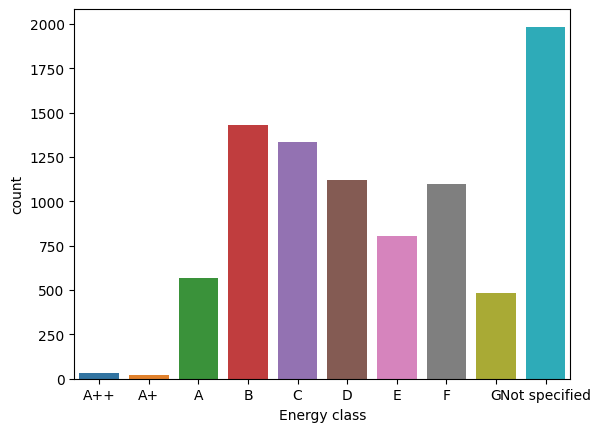

In [44]:
sns.countplot(x="Energy class", data=properties_raw, order=ordered_E_class)

<Axes: xlabel='Energy class', ylabel='Price2'>

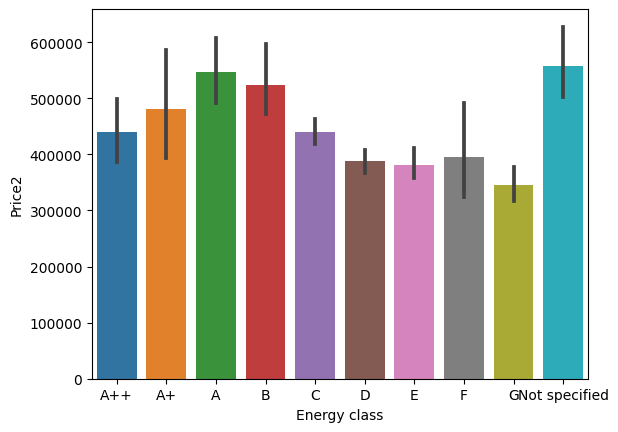

In [45]:
sns.barplot(x="Energy class", y="Price2", data=properties_raw, order=ordered_E_class)


<Axes: xlabel='Primary energy consumption', ylabel='Price2'>

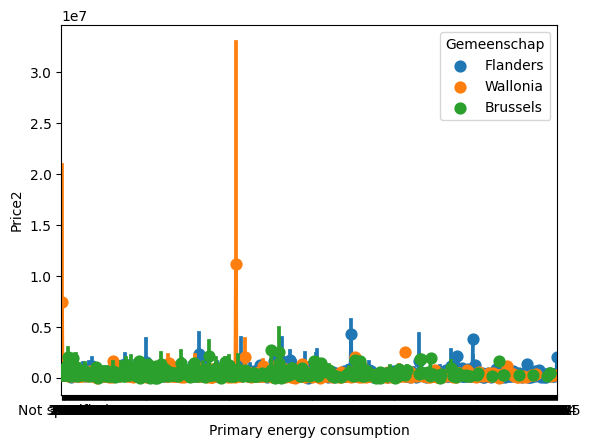

In [91]:
sns.pointplot(x="Primary energy consumption", y="Price2", hue = "Gemeenschap",data=properties_raw)

In [ ]:
sns.pointplot(x="Energy class", y="Price2", hue = "Gemeenschap",data=properties_raw, order=ordered_E_class_aplus_to_g)

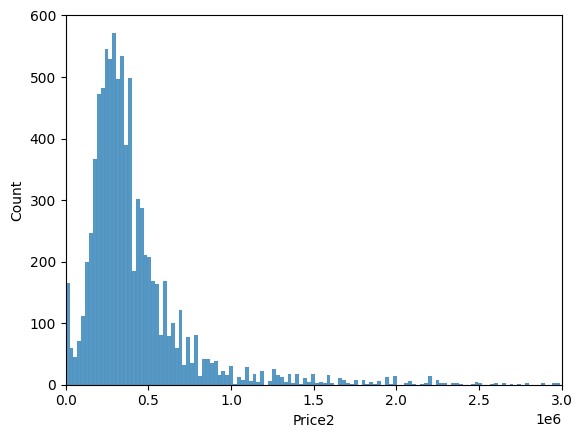

In [50]:
sns.histplot(x="Price2", data=properties_raw)
plt.xlim(0, 3000000)
plt.show()